In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('diabetic_data_final.csv')

In [6]:
# 1

In [7]:
df.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


#### 1a

In [8]:
df.describe()

,Unnamed: 0,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,50882.500000,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,0.379832,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,29377.458084,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,0.485347,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,0.000000,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,25441.250000,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,0.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,50882.500000,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,0.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,76323.750000,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,1.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,101765.000000,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,1.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


### 1d

In [9]:
import seaborn as sns

array([[<AxesSubplot:title={'center':'num_lab_procedures'}, xlabel='[time_in_hospital]'>,
        <AxesSubplot:title={'center':'num_medications'}, xlabel='[time_in_hospital]'>],
       [<AxesSubplot:title={'center':'num_procedures'}, xlabel='[time_in_hospital]'>,
        <AxesSubplot:title={'center':'number_diagnoses'}, xlabel='[time_in_hospital]'>]],
      dtype=object)

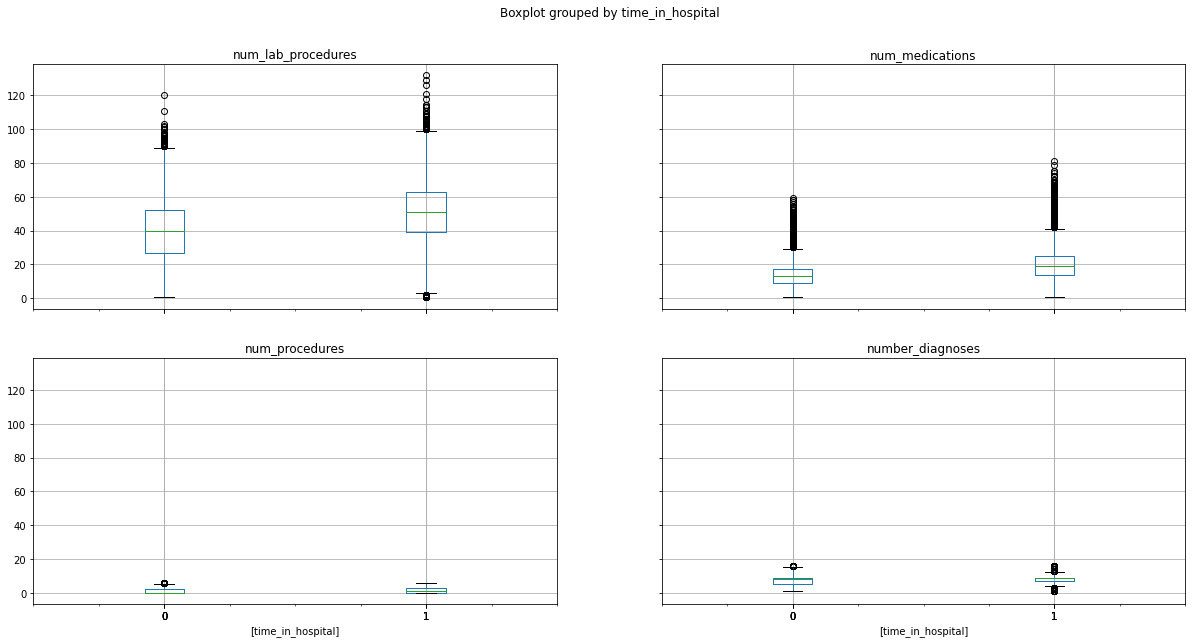

In [10]:
df.loc[:,['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications','number_diagnoses']].boxplot(by='time_in_hospital',figsize=(20,10))

### 1e

In [11]:
df_1e=df.loc[:,['time_in_hospital','gender', 'max_glu_serum', 'insulin']].copy()
df_1e

,time_in_hospital,gender,max_glu_serum,insulin
0,0,Female,None,No
1,0,Female,None,Up
2,0,Female,None,No
3,0,Male,None,Up
4,0,Male,None,Steady
...,...,...,...,...
101761,0,Male,None,Down
101762,1,Female,None,Steady
101763,0,Male,None,Down
101764,1,Female,None,Up


In [14]:
#pd.crosstab()

### 1g

In [15]:
df_1g=df.loc[:,['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications','number_diagnoses']].copy()
df_1g

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses
0,0,41,0,1,1
1,0,59,0,18,9
2,0,11,5,13,6
3,0,44,1,16,7
4,0,51,0,8,5
...,...,...,...,...,...
101761,0,51,0,16,9
101762,1,33,3,18,9
101763,0,53,0,9,13
101764,1,45,2,21,9


In [102]:
df_1g.corr()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses
time_in_hospital,1.000000,0.283895,0.162252,0.400042,0.195601
num_lab_procedures,0.283895,1.000000,0.058066,0.268161,0.152773
num_procedures,0.162252,0.058066,1.000000,0.385767,0.073734
num_medications,0.400042,0.268161,0.385767,1.000000,0.261526
number_diagnoses,0.195601,0.152773,0.073734,0.261526,1.000000


<AxesSubplot:>

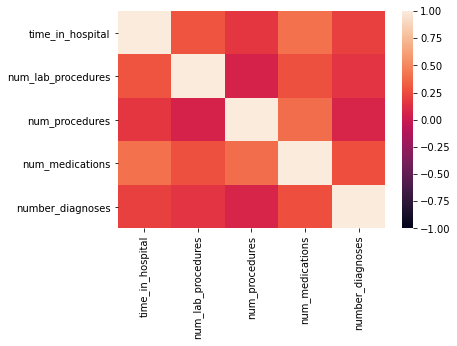

In [101]:
sns.heatmap(df_1g.corr(),vmin=-1,vmax=1)

It shows that:
time in hospital has a strong correlation with num_medications and a weak correlation with num_procedures
num_lab_procedures has a strong correlation with time_in_hospital and a weak correlation with num_procedures
num_procedures has a strong correlation with num_medications and a weak correlation with num_lab_procedures
num_medictions has a strong correlation with time_in_hospital and a weak correlation with num_diagnoses
num_diagnoses has a strong correlation with num_medications and a weak correlation with num_procedures



#### 1b

In [6]:
#age, insulin, change, and diabetesMed
# Summarize the statistics of these variables into count, unique value, top value, and frequency of top value. 

df[['age','insulin', 'change','diabetesMed']].describe(include = ['object'])

,age,insulin,change,diabetesMed
count,101766,101766,101766,101766
unique,10,4,2,2
top,[70-80),No,No,Yes
freq,26068,47383,54755,78363


#### 1c

In [9]:
df['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [10]:
df['age']=df['age'].replace({"[0-10)":0,"[10-20)":1,"[20-30)":2,"[30-40)":3,"[40-50)":4,'[50-60)':5,
       '[60-70)':6, '[70-80)':7, '[80-90)':8, '[90-100)':9})

In [11]:
df

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0,2278392,8222157,Caucasian,Female,0,?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,1,149190,55629189,Caucasian,Female,1,?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,2,64410,86047875,AfricanAmerican,Female,2,?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,3,500364,82442376,Caucasian,Male,3,?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,4,16680,42519267,Caucasian,Male,4,?,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,101761,443847548,100162476,AfricanAmerican,Male,7,?,1,3,7,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,101762,443847782,74694222,AfricanAmerican,Female,8,?,1,4,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,101763,443854148,41088789,Caucasian,Male,7,?,1,1,7,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,101764,443857166,31693671,Caucasian,Female,8,?,2,3,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO


#### 1f

<AxesSubplot:xlabel='gender', ylabel='count'>

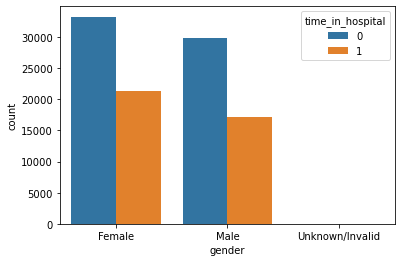

In [49]:
sns.countplot(x=df['gender'],hue=df['time_in_hospital'])


<AxesSubplot:xlabel='age', ylabel='count'>

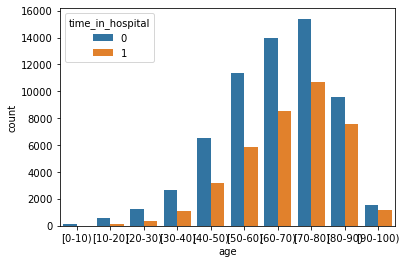

In [50]:
sns.countplot(x=df['age'],hue=df['time_in_hospital'])


<AxesSubplot:xlabel='num_procedures', ylabel='count'>

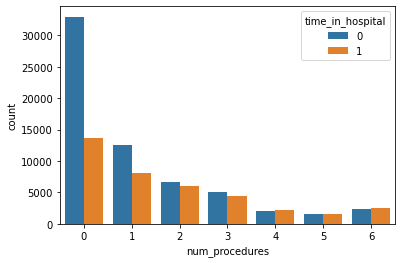

In [51]:
sns.countplot(x=df['num_procedures'],hue=df['time_in_hospital'])


<AxesSubplot:xlabel='num_medications', ylabel='count'>

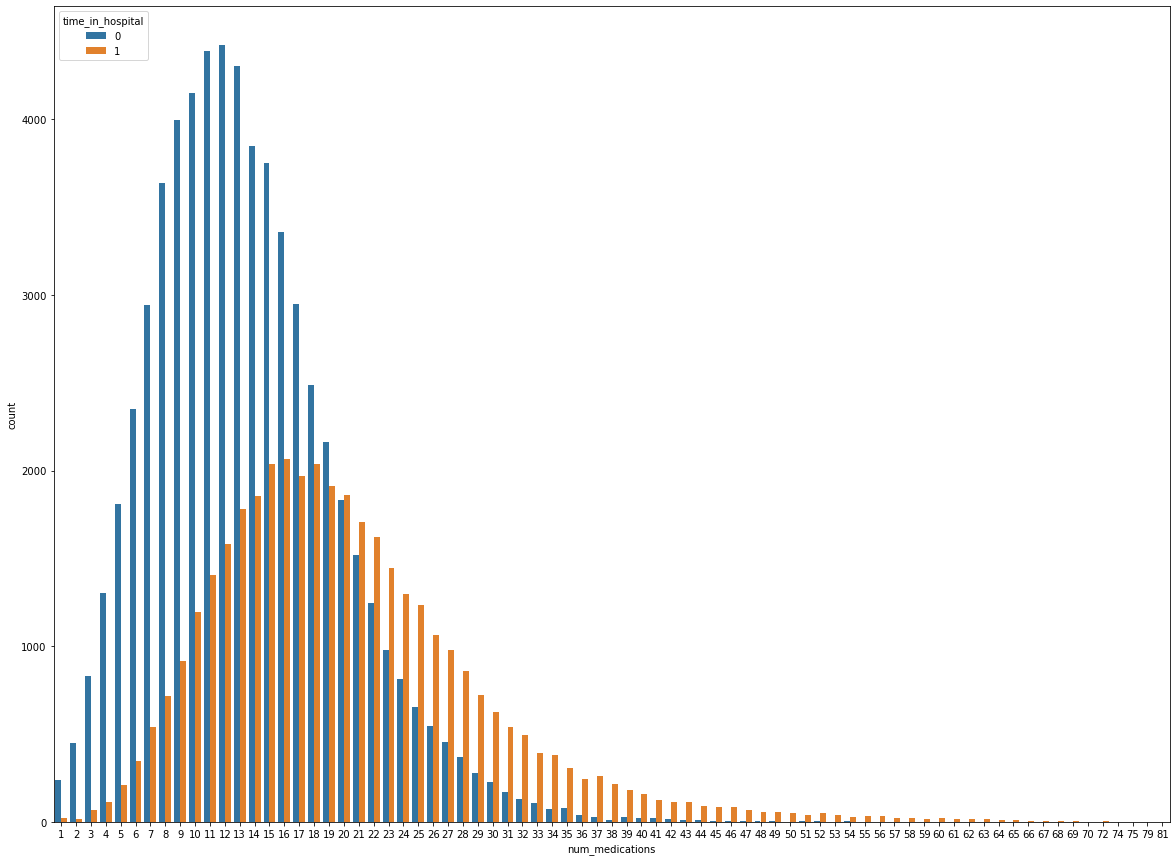

In [57]:
plt.figure(figsize=(20,15))
sns.countplot(x=df['num_medications'],hue=df['time_in_hospital'])


## Exercise 2

In [12]:
df.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0,2278392,8222157,Caucasian,Female,0,?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,1,149190,55629189,Caucasian,Female,1,?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,2,64410,86047875,AfricanAmerican,Female,2,?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,3,500364,82442376,Caucasian,Male,3,?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,4,16680,42519267,Caucasian,Male,4,?,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [13]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(X.iloc[:,[1,0]],y.values,test_size=0.2,random_state=0)

In [14]:
X=df[['num_lab_procedures']].copy()
X.loc[:,'bias']=1
y=df['time_in_hospital']

In [17]:
N_train=int(X.shape[0]*0.8) ## Trainset will have 80% of the samples
X_train,X_test = X.iloc[:N_train,:],X.iloc[N_train:,:]
y_train,y_test = y.iloc[:N_train],y.iloc[N_train:]
X_train=X_train.iloc[:,[1,0]]
X_test=X_test.iloc[:,[1,0]]

#### Train model

In [18]:
X_train

,bias,num_lab_procedures
0,1,41
1,1,59
2,1,11
3,1,44
4,1,51
...,...,...
81407,1,67
81408,1,59
81409,1,62
81410,1,66


In [19]:
num_samples, num_features = X_train.shape 

weights = np.random.random(num_features)
bias = np.random.random(1)

lr = 0.001 
num_iterations = 200

def Sigmoid(x):
    return 1/(1 + np.exp(-x))

#Train Logistic Regression: we learn weights and bias

## Gradient Descent, Stochastic Gradient Descent
for i in range(num_iterations):
    y_predicted = Sigmoid(np.dot(X_train, weights))

    dw = (1/num_samples) * np.dot(X_train.T,(y_predicted - y_train)) #derivatives of weight
#     db = (1/num_samples) * np.sum(y_predicted - y_train) #derivatives of bias
    ## we don't need to calculate the bias separately since we already included in the X_train, so the dw will also include the gradient for the bias
    weights -= lr * dw
#     bias -= lr * db

In [20]:
weights

array([ 0.26651947, -0.00944155])

#### Evaluate model

In [21]:
y_train_pred = Sigmoid(np.dot(X_train, weights))

In [22]:
y_train_pred=(y_train_pred>0.5).astype('int')
y_train_pred

array([0, 0, 1, ..., 0, 0, 0])

In [23]:
print('Train Accuracy: ',(y_train==y_train_pred).mean())

Train Accuracy:  0.5115953422099936


In [25]:
y_test_pred = Sigmoid(np.dot(X_test, weights))

In [26]:
y_test_pred=(y_test_pred>0.5).astype('int')

In [27]:
print('Test Accuracy: ',(y_test==y_test_pred).mean())

Test Accuracy:  0.46610002947823526


## Exercise 3

In [28]:
df.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0,2278392,8222157,Caucasian,Female,0,?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,1,149190,55629189,Caucasian,Female,1,?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,2,64410,86047875,AfricanAmerican,Female,2,?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,3,500364,82442376,Caucasian,Male,3,?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,4,16680,42519267,Caucasian,Male,4,?,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [29]:
X=df[['age', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'insulin','diabetesMed']].copy()
X.loc[:,'bias']=1
y=df['time_in_hospital']

In [30]:
X.head()

,age,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,insulin,diabetesMed,bias
0,0,41,0,1,0,0,0,1,No,No,1
1,1,59,0,18,0,0,0,9,Up,Yes,1
2,2,11,5,13,2,0,1,6,No,Yes,1
3,3,44,1,16,0,0,0,7,Up,Yes,1
4,4,51,0,8,0,0,0,5,Steady,Yes,1


In [31]:
# iloc[ rows ,  columns]

# : means all of them

In [32]:
X=X.iloc[:,[10,0,1,2,3,4,5,6,7,8,9]]
X

,bias,age,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,insulin,diabetesMed
0,1,0,41,0,1,0,0,0,1,No,No
1,1,1,59,0,18,0,0,0,9,Up,Yes
2,1,2,11,5,13,2,0,1,6,No,Yes
3,1,3,44,1,16,0,0,0,7,Up,Yes
4,1,4,51,0,8,0,0,0,5,Steady,Yes
...,...,...,...,...,...,...,...,...,...,...,...
101761,1,7,51,0,16,0,0,0,9,Down,Yes
101762,1,8,33,3,18,0,0,1,9,Steady,Yes
101763,1,7,53,0,9,1,0,0,13,Down,Yes
101764,1,8,45,2,21,0,0,1,9,Up,Yes


In [33]:
X_new=pd.get_dummies(X) ## transforms categorical to numerical

In [34]:
X_new

,bias,age,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,insulin_Down,insulin_No,insulin_Steady,insulin_Up,diabetesMed_No,diabetesMed_Yes
0,1,0,41,0,1,0,0,0,1,0,1,0,0,1,0
1,1,1,59,0,18,0,0,0,9,0,0,0,1,0,1
2,1,2,11,5,13,2,0,1,6,0,1,0,0,0,1
3,1,3,44,1,16,0,0,0,7,0,0,0,1,0,1
4,1,4,51,0,8,0,0,0,5,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,7,51,0,16,0,0,0,9,1,0,0,0,0,1
101762,1,8,33,3,18,0,0,1,9,0,0,1,0,0,1
101763,1,7,53,0,9,1,0,0,13,1,0,0,0,0,1
101764,1,8,45,2,21,0,0,1,9,0,0,0,1,0,1


In [ ]:
# X_train,X_test,y_train,y_test=train_test_split(X_new,y.values,test_size=0.2,random_state=0)

In [ ]:
X_new.shape[0] ## Number of rows / Number of samples

In [35]:
N_train=int(X_new.shape[0]*0.8) ## Trainset will have 80% of the samples
X_train,X_test = X_new.iloc[:N_train,:],X_new.iloc[N_train:,:]
y_train,y_test = y.iloc[:N_train],y.iloc[N_train:]

In [36]:
X_new.shape,X_train.shape,X_test.shape

((101766, 15), (81412, 15), (20354, 15))

#### Train model

In [37]:
num_samples, num_features = X_train.shape 

weights = np.random.random(num_features)
bias = 0

lr = 0.001 
num_iterations = 200

def Sigmoid(x):
    return 1/(1 + np.exp(-x))

#Train Logistic Regression: we learn weights and bias

## Gradient Descent, Stochastic Gradient Descent
for i in range(num_iterations):
    
    y_predicted = Sigmoid(np.dot(X_train, weights) )

    dw = (1/num_samples) * np.dot(X_train.T,(y_predicted - y_train)) #derivatives of weight
#     db = (1/num_samples) * np.sum(y_predicted - y_train) #derivatives of bias
    weights -= lr * dw
#     bias -= lr * db

In [38]:
weights.shape

(15,)

#### Evaluate model

In [39]:
y_train_pred = Sigmoid(np.dot(X_train, weights) )

In [40]:
y_train_pred=(y_train_pred>0.5).astype('int')
y_train_pred

array([0, 0, 1, ..., 0, 0, 1])

In [41]:
print('Train Accuracy: ',(y_train==y_train_pred).mean())

Train Accuracy:  0.44413599960693756


In [42]:
y_test_pred = Sigmoid(np.dot(X_test, weights) )

In [43]:
y_test_pred=(y_test_pred>0.5).astype('int')

In [44]:
print('Test Accuracy: ',(y_test==y_test_pred).mean())

Test Accuracy:  0.38518227375454456


### 3b

In [45]:
features=list(X_new.columns)
features.remove('bias')

In [46]:
features_include=['bias']
best_features=['bias']

In [ ]:
## Select one feature. Train, evaluate
## Keep that feature, go over the next features. If it improves, then we keep, if not we keep looking for other features

In [48]:
N_train=int(X_new.shape[0]*0.8) ## Trainset will have 80% of the samples
X_train_original,X_test_original = X_new.iloc[:N_train,:],X_new.iloc[N_train:,:]
y_train,y_test = y.iloc[:N_train],y.iloc[N_train:]

In [49]:
final_output={}
best_accuracy=0
all_best_accuracies=[]
for ii in range(5): ## we set to do up to five features, the forward selection will explore on five features maximum
    for feature_idx in features:
        features_include=best_features.copy()
        features_include.append(feature_idx)
        X_train=X_train_original.loc[:,features_include]
        X_test = X_test_original.loc[:,features_include]
        

        num_samples, num_features = X_train.shape 

        weights = np.random.random(num_features)
        bias = 0

        lr = 0.001 
        num_iterations = 200

        def Sigmoid(x):
            return 1/(1 + np.exp(-x))
        ## Gradient Descent, Stochastic Gradient Descent
        for i in range(num_iterations):

            y_predicted = Sigmoid(np.dot(X_train, weights) + bias)

            dw = (1/num_samples) * np.dot(X_train.T,(y_predicted - y_train)) #derivatives of weight
#             db = (1/num_samples) * np.sum(y_predicted - y_train) #derivatives of bias
            weights -= lr * dw
#             bias -= lr * db

        y_train_pred = Sigmoid(np.dot(X_train, weights))
        y_train_pred=(y_train_pred>0.5).astype('int')
        train_accuracy=(y_train==y_train_pred).mean()

        y_test_pred = Sigmoid(np.dot(X_test, weights) )
        y_test_pred=(y_test_pred>0.5).astype('int')
        test_accuracy= (y_test==y_test_pred).mean()
        feature=feature_idx
#         print(f'feature {feature} train acc: {train_accuracy} test_acc: {test_accuracy}')

        final_output[feature_idx]=test_accuracy

        if test_accuracy>best_accuracy:
            best_accuracy=test_accuracy
            best_feature=feature_idx
            all_best_accuracies.append(best_accuracy)

    
    if best_feature in features:
        best_features.append(best_feature)
        features.remove(best_feature)
        
    


In [50]:
print(f'best features {best_features} best_accuracy {best_accuracy}')

best features ['bias', 'num_lab_procedures', 'number_diagnoses', 'num_medications'] best_accuracy 0.6347155350299696


### 3c

The model with the forward selection outputs best test accuracy

### 3d

In [51]:

sizes=[25000,50000,75000]

output={}
for train_size in sizes:

    X_train_original,X_test_original = X_new.iloc[:train_size,:],X_new.iloc[train_size:,:]
    y_train,y_test = y.iloc[:train_size],y.iloc[train_size:]
    X_train=X_train_original.loc[:,best_features]
    X_test=X_test_original.loc[:,best_features]

    num_samples, num_features = X_train.shape 

    weights = np.random.random(num_features)
    bias = 0

    lr = 0.001 
    num_iterations = 200

    def Sigmoid(x):
        return 1/(1 + np.exp(-x))

    #Train Logistic Regression: we learn weights and bias

    ## Gradient Descent, Stochastic Gradient Descent
    for i in range(num_iterations):

        y_predicted = Sigmoid(np.dot(X_train, weights))

        dw = (1/num_samples) * np.dot(X_train.T,(y_predicted - y_train)) #derivatives of weight
#         db = (1/num_samples) * np.sum(y_predicted - y_train) #derivatives of bias
        weights -= lr * dw
#         bias -= lr * db

    y_train_pred = Sigmoid(np.dot(X_train, weights) )
    y_train_pred=(y_train_pred>0.5).astype('int')
    train_accuracy=(y_train==y_train_pred).mean()


    y_test_prob = Sigmoid(np.dot(X_test, weights))
    y_test_pred=(y_test_prob>0.5).astype('int')
    test_accuracy= (y_test==y_test_pred).mean()

    log_loss=-(y_test_prob*np.log(y_test_prob)).mean()
    output[train_size]=log_loss

In [52]:
output

{25000: 0.2337690399837683,
 50000: 0.22046476806048895,
 75000: 0.2156105402222629}

The log loss decreases as we increase the training set

### 4

In [55]:
best_features

['bias', 'num_lab_procedures', 'number_diagnoses', 'num_medications']

In [56]:
train_size=75000
X_train_original,X_test_original = X_new.iloc[:train_size,:],X_new.iloc[train_size:,:]
y_train,y_test = y.iloc[:train_size],y.iloc[train_size:]
X_train=X_train_original.loc[:,best_features]
X_test=X_test_original.loc[:,best_features]

num_samples, num_features = X_train.shape 

weights = np.random.random(num_features)
bias = 0

lr = 0.001 
num_iterations = 200

def Sigmoid(x):
    return 1/(1 + np.exp(-x))

#Train Logistic Regression: we learn weights and bias

## Gradient Descent, Stochastic Gradient Descent
for i in range(num_iterations):

    y_predicted = Sigmoid(np.dot(X_train, weights))

    dw = (1/num_samples) * np.dot(X_train.T,(y_predicted - y_train)) +  2*weights
#     db = (1/num_samples) * np.sum(y_predicted - y_train) +  2*bias 
    weights -= lr * dw
#     bias -= lr * db

y_train_pred = Sigmoid(np.dot(X_train, weights) )
y_train_pred=(y_train_pred>0.5).astype('int')
train_accuracy=(y_train==y_train_pred).mean()


y_test_prob = Sigmoid(np.dot(X_test, weights) )
y_test_pred=(y_test_prob>0.5).astype('int')
test_accuracy= (y_test==y_test_pred).mean()

log_loss=-(y_test_prob*np.log(y_test_prob)).mean()


In [57]:
print(f'test accuracy: {test_accuracy}')

test accuracy: 0.3245908989015916


In [58]:
## With Feature Scaling

In [87]:
best_features

['bias', 'num_lab_procedures', 'number_diagnoses', 'num_medications']

In [88]:
## feature scaling: MinMaxScaler, StandardScaler

In [89]:
train_size=75000
X_train_original,X_test_original = X_new.iloc[:train_size,:],X_new.iloc[train_size:,:]
y_train,y_test = y.iloc[:train_size],y.iloc[train_size:]

X_train=X_train_original.loc[:,best_features]/X_train_original.loc[:,best_features].max()
X_test=X_test_original.loc[:,best_features]/X_train_original.loc[:,best_features].max()

num_samples, num_features = X_train.shape 

weights = np.random.random(num_features)
bias = 0

lr = 0.001 
num_iterations = 200

def Sigmoid(x):
    return 1/(1 + np.exp(-x))

#Train Logistic Regression: we learn weights and bias

## Gradient Descent, Stochastic Gradient Descent
for i in range(num_iterations):

    y_predicted = Sigmoid(np.dot(X_train, weights))

    dw = (1/num_samples) * np.dot(X_train.T,(y_predicted - y_train)) +  2*weights
#     db = (1/num_samples) * np.sum(y_predicted - y_train) +  2*bias 
    weights -= lr * dw
#     bias -= lr * db

y_train_pred = Sigmoid(np.dot(X_train, weights) )
y_train_pred=(y_train_pred>0.5).astype('int')
train_accuracy=(y_train==y_train_pred).mean()


y_test_prob = Sigmoid(np.dot(X_test, weights) )
y_test_pred=(y_test_prob>0.7).astype('int')
test_accuracy= (y_test==y_test_pred).mean()



In [90]:
from collections import Counter
Counter(y_test_pred)

Counter({0: 24664, 1: 2102})

In [91]:
print(f'test accuracy: {test_accuracy}')

test accuracy: 0.7062317865949339


### 4d

In [ ]:
df = pd.read_csv('diabetic_data_final.csv')

In [ ]:
df.head()

In [64]:
X=df.copy()
X.loc[:,'bias']=1
y=df['time_in_hospital']

In [65]:
X=X.loc[:,best_features]

In [66]:
train_size=int(X.shape[0]*0.8)
X_train4,X_test4 = X.iloc[:train_size,:],X.iloc[train_size:,:]
y_train4,y_test4 = y.iloc[:train_size],y.iloc[train_size:]


In [67]:
X_train4.shape,X_test4.shape

((81412, 4), (20354, 4))

In [68]:
num_samples, num_features = X_train4.shape 

weights = np.random.random(num_features)
bias = 0

lr = 0.001 
num_iterations = 200

def Sigmoid(x):
    return 1/(1 + np.exp(-x))

#Train Logistic Regression: we learn weights and bias

## Gradient Descent, Stochastic Gradient Descent
for i in range(num_iterations):
   
    error=y_train4-X_train4.dot(weights)
    dw= -X_train4.T.dot(error)/len(error) 
    ## when we calculate the gradient of the loss with respect to ws, we are going to get the gradient for the bias + gradient for weights, because in the X_train, we added a bias column

    weights -= lr * dw

y_train_pred = np.dot(X_train4, weights)
y_train_pred=(y_train_pred>0.5).astype('int')
train_accuracy=(y_train4==y_train_pred).mean()


y_test_prob = Sigmoid(np.dot(X_test4, weights))
y_test_pred=(y_test_prob>0.5).astype('int')
test_accuracy= (y_test4==y_test_pred).mean()

MSE= ((y_test_pred - y_test4)**2).sum()/(2*len(y_test4))


In [69]:
MSE

0.32993514788248013

The last model's cost function is an MSE which fits best for a linear regression model. It is not the best cost function for a classification task. Exercise 4a outputs a better result, since the cost function fits best for that purpose